In [177]:
options(scipen=100,warn=-1)

# 회귀분석(Regression)
- 데이터를 이용하여 함수식(y=ax+b)를 구한다.
- 기울기(DeepLearning에서 'weight')와 절편(DL에서 'bias')을 DataSet으로 최적값을 구한다.
    (정답과 오차율의 차이가 제일 적은 것으로 선택한다.)
- 기울기와 절편으로 y값을 예측할 수 있다.

### 단순회귀 분석 : y=ax+b

In [178]:
regression <- read.csv('../data/regression.csv')

In [179]:
head(regression)
tail(regression)

age,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


,age,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


In [180]:
str(regression)

'data.frame':	31 obs. of  3 variables:
 $ age   : Factor w/ 31 levels "0~3Months","10Year",..: 1 19 26 31 5 15 18 21 23 25 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


In [181]:
# 기본 통계량 확인
summary(regression)

          age         Height          Weight     
 0~3Months  : 1   Min.   : 59.1   Min.   : 5.90  
 10Year     : 1   1st Qu.:105.7   1st Qu.:17.90  
 11Year     : 1   Median :150.7   Median :45.20  
 12Year     : 1   Mean   :135.8   Mean   :42.62  
 12~18Months: 1   3rd Qu.:169.8   3rd Qu.:66.65  
 13Year     : 1   Max.   :173.8   Max.   :72.30  
 (Other)    :25                                  

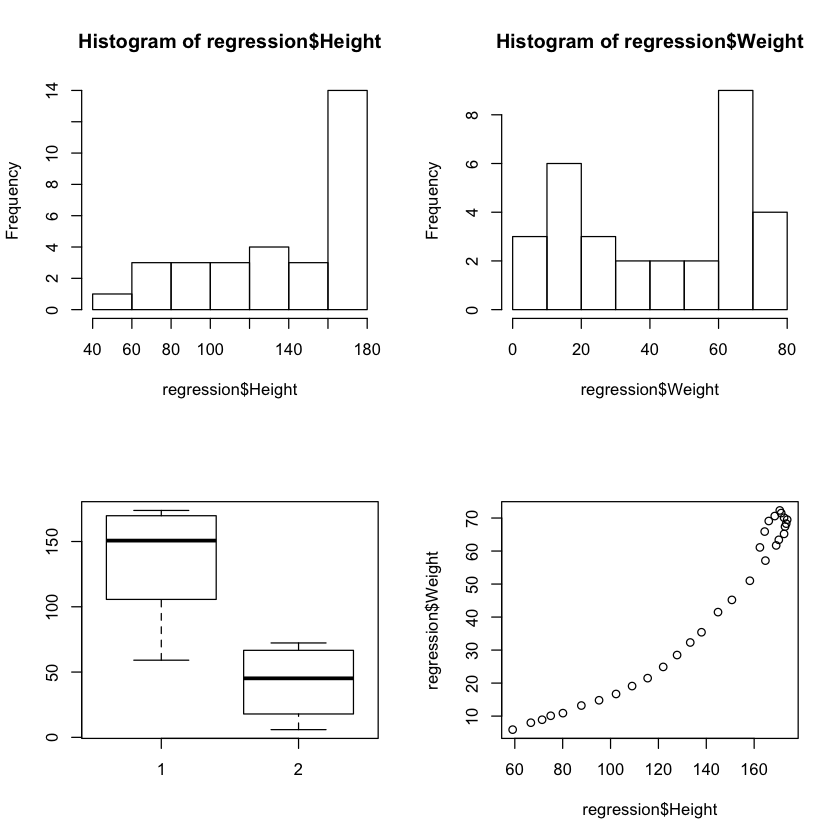

In [182]:
par(mfrow=c(2,2))
hist(regression$Height)
hist(regression$Weight)
boxplot(regression$Height,regression$Weight)
plot(regression$Height,regression$Weight) # 선형 > 공식 y=ax+b 만들기

In [183]:
cor(regression$Height,regression$Weight)

[1] 0.9672103

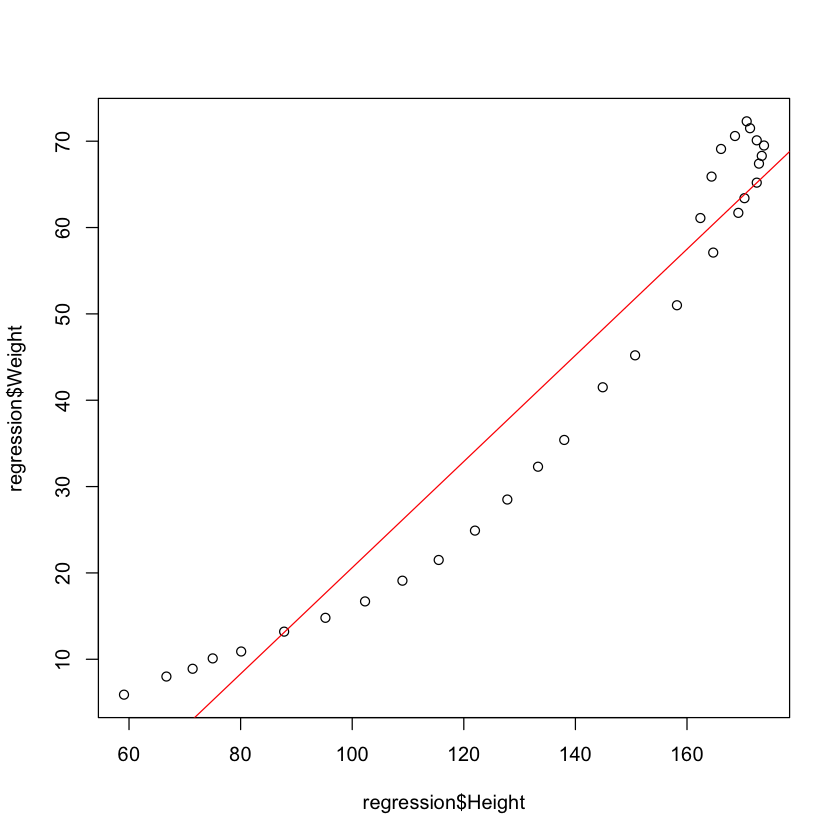

In [184]:
plot(regression$Weight ~ regression$Height)
# 회귀선(중심선,평균선)
r<-lm(regression$Weight ~ regression$Height)
abline(r,col='red')

In [185]:
# 분석결과, 무슨 원리로 했니?
summary(r)


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value             Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666       0.000000000142 ***
regression$Height   0.61474    0.02998  20.508 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 0.00000000000000022


> p-value: < 0.00000000000000022 (< 0.05)<br>
> Adjusted R-squared:  0.9333 <- 예측력<br>
> Residual standard error: 6.355 <- 표준오차<br>
Coefficient : *** 이 없으면 무의미한 계수이므로 사용하면 안된다.<br>
freedom 자유도?

In [186]:
# 회귀식
r


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


In [187]:
# 키가 170인 사람의 몸무게 : x=height, y=weight, a=regression$Height, b=intercept
0.6147*170+(-40.8659)

# 표준 오차 적용한 키가 170인 사람의 몸무게, Residual standard error 값을 뺀 수부터 더한 수까지 범위.
cat(0.6147*170+(-40.8659) - 6.355,'~',0.6147*170+(-40.8659) + 6.3555)

[1] 63.6331

57.2781 ~ 69.9886

---
### IQ

In [188]:
iq <- read.csv('../data/IQ.csv')
head(iq)
str(iq)
summary(iq)

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1


'data.frame':	10 obs. of  6 variables:
 $ 이름         : Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ 성적         : int  90 75 77 83 65 80 83 70 87 79
 $ IQ           : int  140 125 120 135 105 123 132 115 128 131
 $ 다니는.학원수: int  2 1 1 2 0 3 3 1 4 2
 $ 게임하는.시간: int  1 3 0 3 4 1 4 1 0 2
 $ TV시청.시간  : int  0 3 4 2 4 1 1 3 0 3


      이름        성적            IQ        다니는.학원수  게임하는.시간
 A      :1   Min.   :65.0   Min.   :105.0   Min.   :0.00   Min.   :0.0  
 B      :1   1st Qu.:75.5   1st Qu.:120.8   1st Qu.:1.00   1st Qu.:1.0  
 C      :1   Median :79.5   Median :126.5   Median :2.00   Median :1.5  
 D      :1   Mean   :78.9   Mean   :125.4   Mean   :1.90   Mean   :1.9  
 E      :1   3rd Qu.:83.0   3rd Qu.:131.8   3rd Qu.:2.75   3rd Qu.:3.0  
 F      :1   Max.   :90.0   Max.   :140.0   Max.   :4.00   Max.   :4.0  
 (Other):4                                                              
  TV시청.시간 
 Min.   :0.0  
 1st Qu.:1.0  
 Median :2.5  
 Mean   :2.1  
 3rd Qu.:3.0  
 Max.   :4.0  
              

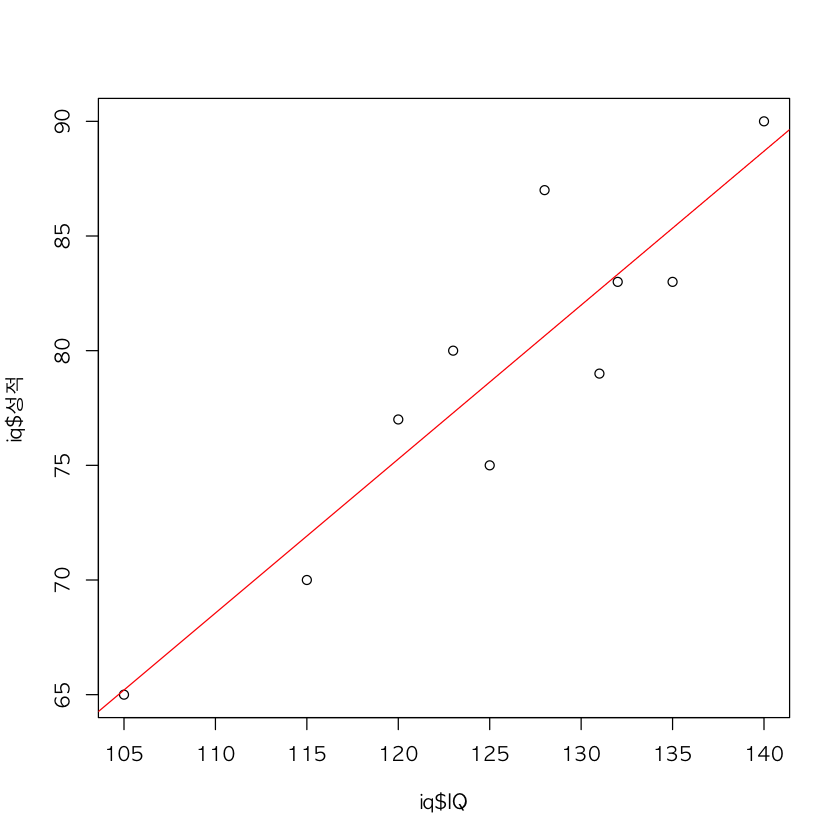

In [189]:
# iq가 126인 사람의 성적을 예측해보기
par(family='AppleGothic')
plot(iq$성적 ~ iq$IQ)
iq1 <- lm(iq$성적 ~ iq$IQ)
abline(iq1,col='red')

In [190]:
cor(iq$성적,iq$IQ)
summary(iq1)

[1] 0.9102242


Call:
lm(formula = iq$성적 ~ iq$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [191]:
iq1


Call:
lm(formula = iq$성적 ~ iq$IQ)

Coefficients:
(Intercept)        iq$IQ  
    -5.2918       0.6714  


In [192]:
# IQ 126의 성적을 예측하라 : x=IQ, y= 성적, a= 0.6714, b=-5.2918(무의미한 계수값)
cat('iq 126의 성적 예측 :',126*0.6714 - 3.322,'~', 126*0.6714 + 3.322)

iq 126의 성적 예측 : 81.2744 ~ 87.9184

In [193]:
# 성적과 가장 관련이 깊은 항목은
(iq)
cor(iq$성적,iq[3:6])
cor(iq[-1])

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1
G,83,132,3,4,1
H,70,115,1,1,3
I,87,128,4,0,0
J,79,131,2,2,3


IQ,다니는.학원수,게임하는.시간,TV시청.시간
0.9102242,0.7840514,-0.3383549,-0.8473333


,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


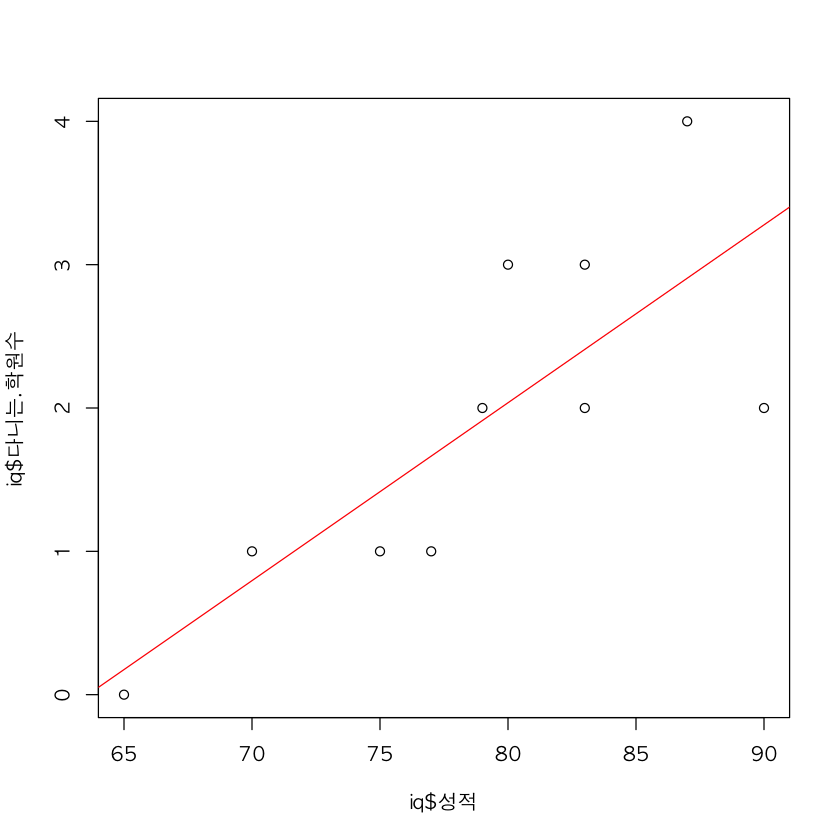

In [194]:
# 학원을 몇군데 다녀야 성적이 90점 이상이 될까?
par(family="AppleGothic")
plot(iq$다니는.학원수~iq$성적)

iq2 <- lm(iq$다니는.학원수~iq$성적)
abline(iq2,col='red')

In [195]:
summary(iq2)


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
iq$성적      0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


In [196]:
iq2
cat('다니는 학원 수 :',0.1241*90-7.8916-0.7882,'~',0.1241*90-7.8916+0.7882)


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
    -7.8916       0.1241  


다니는 학원 수 : 2.4892 ~ 4.0656

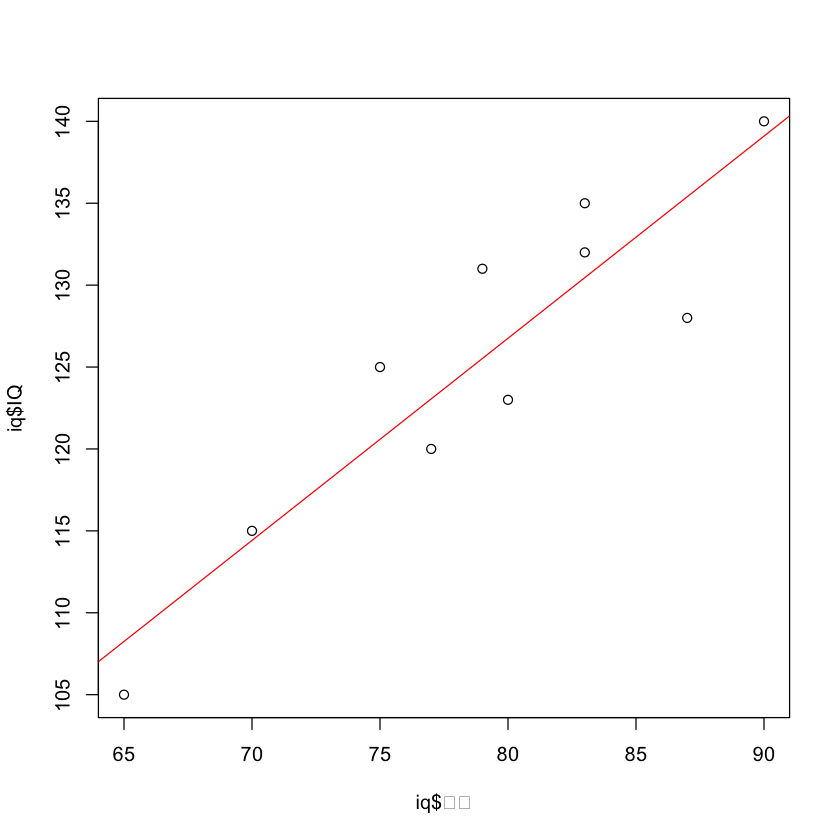

In [197]:
# 성적이 85점이라면 IQ는 얼마인가?
plot(iq$IQ~iq$성적)
iq3<-lm(iq$IQ~iq$성적)
abline(iq3,col='red')

In [198]:
summary(iq3)


Call:
lm(formula = iq$IQ ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [199]:
iq3


Call:
lm(formula = iq$IQ ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
     28.035        1.234  


In [200]:
cat('성적이 85점일 때 IQ는', 1.234*85-4.504,'~',1.234*85+4.504,'사이일 것입니다.')

성적이 85점일 때 IQ는 100.386 ~ 109.394 사이일 것입니다.

---
### 다중 회귀 분석
- 여러개의 항목들로 구성된 식으로 예측하는 방법

attitude
- 대형 금융기관의 사무직 대상으로 진급의 요소에 대한 설문조사, 30개부서(무작위) 약 35명을 대상으로 한 설문지데이터
- 각 수치는 각 부서의 7개 질문에 대한 점수를 나타낸다.

In [201]:
help(attitude)

attitude               package:datasets                R Documentation

_T_h_e _C_h_a_t_t_e_r_j_e_e-_P_r_i_c_e _A_t_t_i_t_u_d_e _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     From a survey of the clerical employees of a large financial
     organization, the data are aggregated from the questionnaires of
     the approximately 35 employees for each of 30 (randomly selected)
     departments.  The numbers give the percent proportion of
     favourable responses to seven questions in each department.

_U_s_a_g_e:

     attitude
     
_F_o_r_m_a_t:

     A data frame with 30 observations on 7 variables. The first column
     are the short names from the reference, the second one the
     variable names in the data frame:

          Y  rating      numeric  Overall rating                    
       X[1]  complaints  numeric  Handling of employee complaints   
       X[2]  privileges  numeric  Does not allow special privileges 
       X[3]  learni

In [202]:
head(attitude)

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


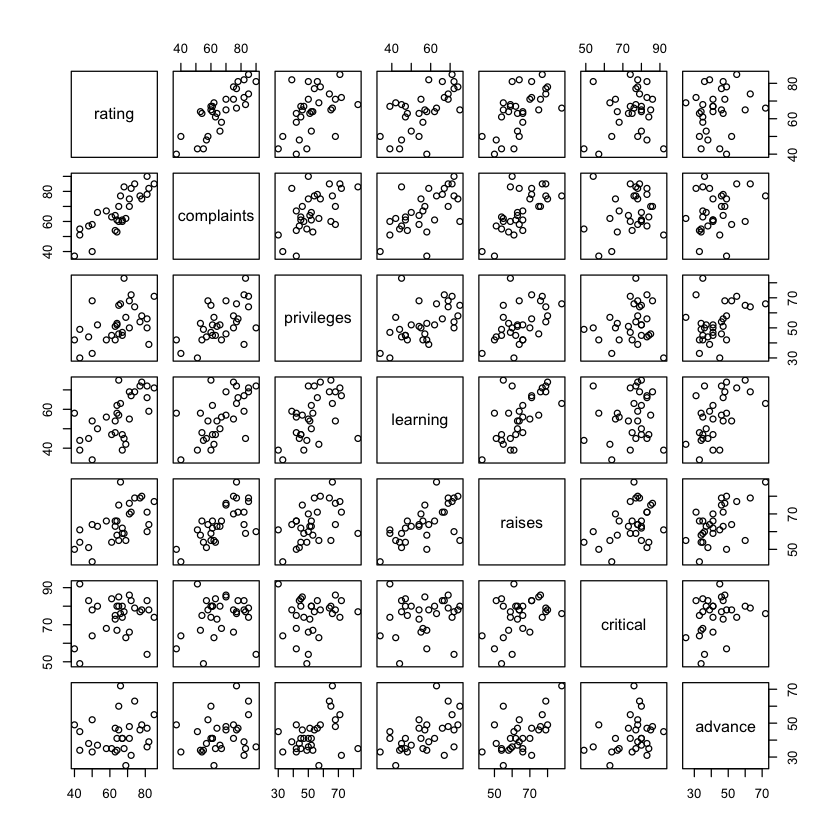

In [203]:
plot(attitude) # rating-complaints가 가장 이쁜 모양

In [204]:
# 회귀분석
lm(rating ~ complaints + privileges + learning + raises + critical + advance, data = attitude)
model <- lm(rating ~ ., data = attitude) # '.' : 전체 데이터 중에 앞의 기준을 빼고 모두
model


Call:
lm(formula = rating ~ complaints + privileges + learning + raises + 
    critical + advance, data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  



Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


> rating = 0.61319*complaints - 0.07305*privileges +0.32033*learning + ... + 10.78708

In [205]:
# model 검토
summary(model)
# rating과 complaints만 필요하다.


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 0.0000124


> 전부를 선택했을 때, Adjusted R-squared:  0.6628 

In [206]:
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


In [207]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거, step()
reduced <- step(model, direction='backward') # model 기준, backward 방향으로

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  

In [208]:
summary(reduced)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value   Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398      0.174    
complaints    0.6435     0.1185   5.432 0.00000957 ***
learning      0.2112     0.1344   1.571      0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 0.00000006058


> 2개만 선택됐을 때, Adjusted R-squared:  0.6864, 예측력이 0.02 정도 높아졌다.

In [209]:
reduced


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


---
### iris에 대한 다중회귀분석

In [210]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
5.4,3.9,1.7,0.4,1


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
5.4,3.9,1.7,0.4,1
4.6,3.4,1.4,0.3,1
5.0,3.4,1.5,0.2,1
4.4,2.9,1.4,0.2,1
4.9,3.1,1.5,0.1,1


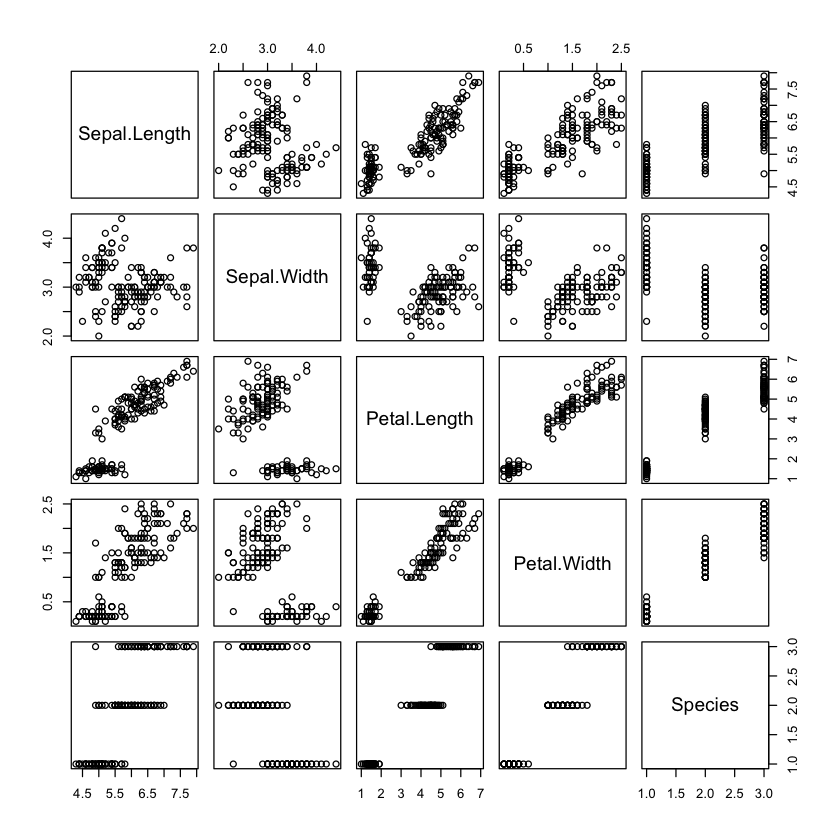

In [211]:
plot(iris)
iris

In [212]:
model1 <- lm(as.numeric(Species) ~ ., data = iris) # 숫자만 분석되기 때문에 
model1
summary(model1)


Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Coefficients:
 (Intercept)  Sepal.Length   Sepal.Width  Petal.Length   Petal.Width  
     1.18650      -0.11191      -0.04008       0.22865       0.60925  



Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value      Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 0.00000004150 ***
Sepal.Length -0.11191    0.05765  -1.941        0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671        0.5030    
Petal.Length  0.22865    0.05685   4.022 0.00009255215 ***
Petal.Width   0.60925    0.09446   6.450 0.00000000156 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 0.00000000000000022


In [213]:
cor(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411,0.7825612
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259,-0.4266576
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654,0.9490347
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000,0.9565473
Species,0.7825612,-0.4266576,0.9490347,0.9565473,1.0000000


In [214]:
reduced1 <- step(model1, direction='backward')

Start:  AIC=-450.56
as.numeric(Species) ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
as.numeric(Species) ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38


In [215]:
reduced1
summary(reduced1)


Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Coefficients:
 (Intercept)  Sepal.Length  Petal.Length   Petal.Width  
      1.1447       -0.1362        0.2521        0.5869  



Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value       Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 0.000000027233 ***
Sepal.Length -0.13624    0.04475  -3.044        0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 0.000000086707 ***
Petal.Width   0.58689    0.08822   6.652 0.000000000541 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 0.00000000000000022
